In [67]:
import pandas as pd

In [68]:
df = pd.read_csv('data.csv')
df.head()

,Gender,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion,Personality
0,Male,17,7,4,7,3,2,extraverted
1,Male,19,4,5,4,6,6,serious
2,Female,18,7,6,4,5,5,dependable
3,Female,22,5,6,7,4,3,extraverted
4,Female,19,7,4,6,5,4,lively


In [69]:
# # Coverting Male/Female to 0/1
# for i in range(df.shape[0]):
#     if df.loc[i,'Gender'] == "Male":
#         df.loc[i,'Gender'] = 0
#     else:
#         df.loc[i,'Gender'] = 1
# df.head()

In [70]:
x = df.drop(['Personality','Gender','Age'], axis=1)
y = df['Personality']

In [77]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=10)

In [78]:
x_train.head()

,openness,neuroticism,conscientiousness,agreeableness,extraversion
504,7,4,6,5,6
876,7,7,2,5,7
140,7,7,6,6,4
688,5,4,4,4,5
772,5,5,4,2,7


In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracy = []
k_val = []

print("K Accuracy")

for i in range(1,41):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    k_val.append(i)
    accuracy.append(accuracy_score(y_test, y_pred)*100)
    print(k_val[i-1],accuracy[i-1])

K Accuracy
1 30.859375
2 30.859375
3 27.734375
4 27.734375
5 29.296875
6 26.5625
7 28.90625
8 27.734375
9 30.859375
10 30.859375
11 29.6875
12 30.859375
13 28.515625
14 28.125
15 28.515625
16 30.859375
17 30.859375
18 32.03125
19 31.640625
20 31.640625
21 32.8125
22 33.984375
23 32.8125
24 30.859375
25 31.640625
26 30.859375
27 30.859375
28 31.640625
29 30.859375
30 32.03125
31 31.640625
32 33.984375
33 33.984375
34 35.9375
35 34.375
36 35.546875
37 33.984375
38 35.546875
39 33.984375
40 33.984375


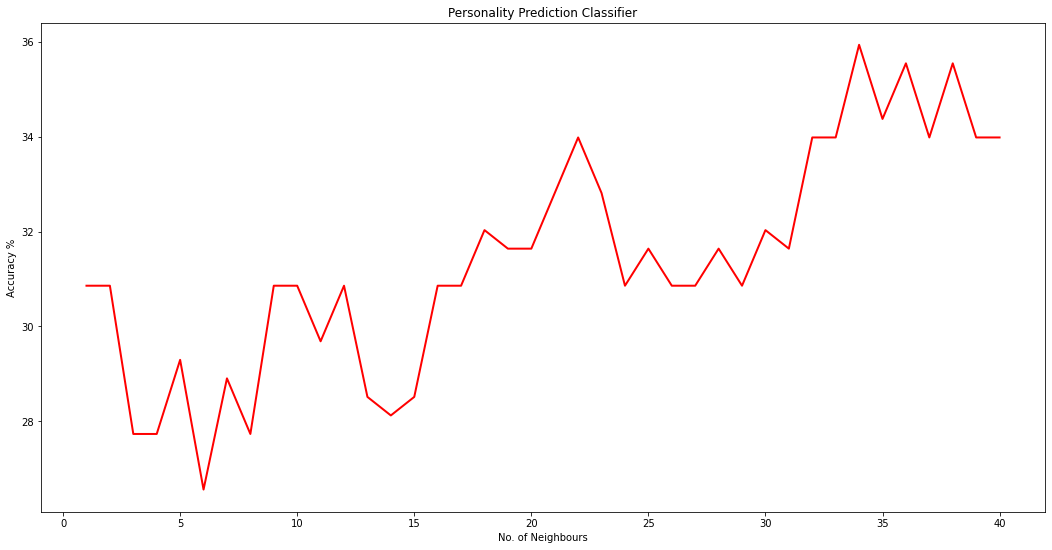

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 9))
plt.title('Personality Prediction Classifier')
plt.xlabel('No. of Neighbours')
plt.ylabel('Accuracy %')
plt.plot(k_val,accuracy,color='red',linewidth=2)